This script is an exmaple for creating and fitting PSDs of data. Currently loads in .mat files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

In [376]:
def load_data(filepath, channels):
    data = sio.loadmat(filepath)
    tts = np.zeros((len(channels), data['Length'][0][0]))
    for n, i in enumerate(channels):
        tt = np.transpose(data[i])[0]
        tts[n] = tt
    return tts, data['Tinterval'][0][0]

def linewidth(f, f0, A, y, c):
    return A/((f**2-f0**2)**2+(f*y)**2) + c

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

def fit_and_plot_PSD(PSD, lb, ub, p0):
    PSDs_fitted = []
    PSD_fits = []
    for i in PSD:
        pop, cov = opt.curve_fit(linewidth, i[0][lb:ub], i[1][lb:ub], p0 = p0)
        PSD_fits.append(pop)
        PSD_fitted = linewidth(i[0], pop[0], pop[1], pop[2], pop[3])
        PSDs_fitted.append(PSD_fitted)

    plt.figure(figsize = (5, 5))
    for n, i in enumerate(PSD):
        plt.plot(i[0][lb:ub]/1000, i[1][lb:ub])
        plt.plot(i[0][lb:ub]/1000, PSDs_fitted[n][lb:ub])
    plt.yscale('log')
    plt.ylabel('PSD (V$^2$/Hz)')
    plt.xlabel('Frequency (kHz)')
    plt.show()

    
    return PSD_fits, PSDs_fitted

In [437]:
# changed to lower sampling at 465
filepath = 'D:\\Experiment\\Cooling\\230823\\Pump Down 4\\tt'
extensions = [' (638).mat']
channels = ['A', 'B']
tts, Tinterval = load_data(filepath+extensions[0], channels)
PSDA, PSDB = make_PSDs(filepath, extensions, channels)

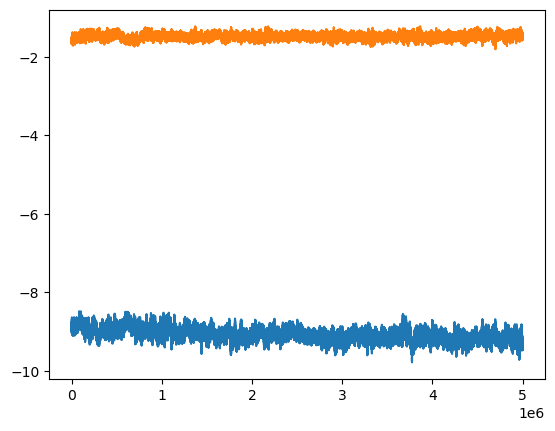

In [438]:
plt.plot(tts[0][::10])
plt.plot(tts[1][::10])

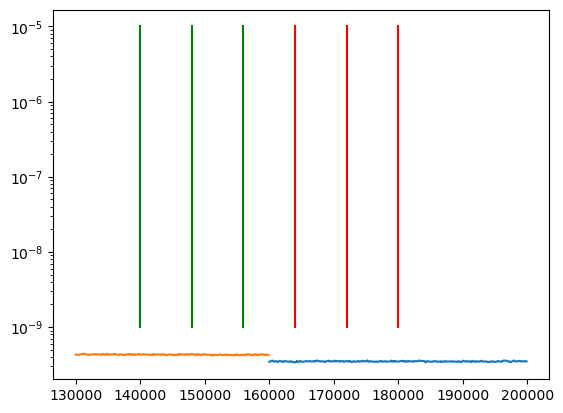

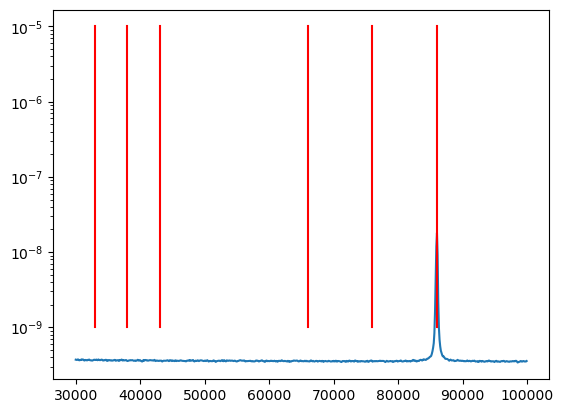

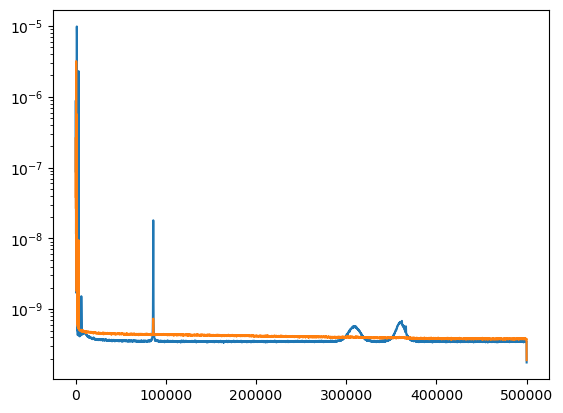

In [439]:
plt.figure()
lb = 1600
ub = 2000

plt.plot(PSDA[0][0][lb:ub], PSDA[0][1][lb:ub])
#plt.plot(PSDB[0][0], PSDB[0][1])
plt.plot([172000, 172000], [10**(-9), 10**(-5)], 'r')
plt.plot([172000+8000, 172000+8000], [10**(-9), 10**(-5)], 'r')
plt.plot([172000-8000, 172000-8000], [10**(-9), 10**(-5)], 'r')

lb = 1300
ub = 1600
plt.plot(PSDB[0][0][lb:ub], PSDB[0][1][lb:ub])
plt.plot([148000, 148000], [10**(-9), 10**(-5)], 'g')
plt.plot([148000+8000, 148000+8000], [10**(-9), 10**(-5)], 'g')
plt.plot([148000-8000, 148000-8000], [10**(-9), 10**(-5)], 'g')
plt.yscale('log')
plt.figure()
lb = 300
ub = 1000

plt.plot(PSDA[0][0][lb:ub], PSDA[0][1][lb:ub])
#plt.plot(PSDB[0][0], PSDB[0][1])
plt.plot([38000, 38000], [10**(-9), 10**(-5)], 'r')
plt.plot([38000+5000, 38000+5000], [10**(-9), 10**(-5)], 'r')
plt.plot([38000-5000, 38000-5000], [10**(-9), 10**(-5)], 'r')


plt.plot([2*38000, 2*38000], [10**(-9), 10**(-5)], 'r')
plt.plot([2*38000+10000, 2*38000+10000], [10**(-9), 10**(-5)], 'r')
plt.plot([2*38000-10000, 2*38000-10000], [10**(-9), 10**(-5)], 'r')
plt.yscale('log')
plt.figure()
plt.plot(PSDA[0][0], PSDA[0][1])
plt.plot(PSDB[0][0], PSDB[0][1])
plt.yscale('log')

In [580]:
# Bit of calibration 
def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230823\\Calibration\\'
extensions = ['tt.mat']
channels = ['A', 'B']
PSDA, PSDB = make_PSDs(filepath, extensions, channels)


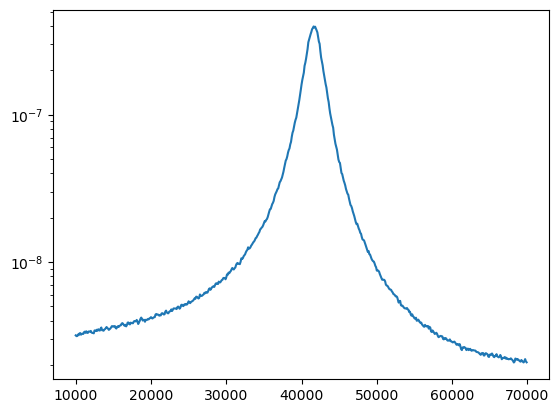

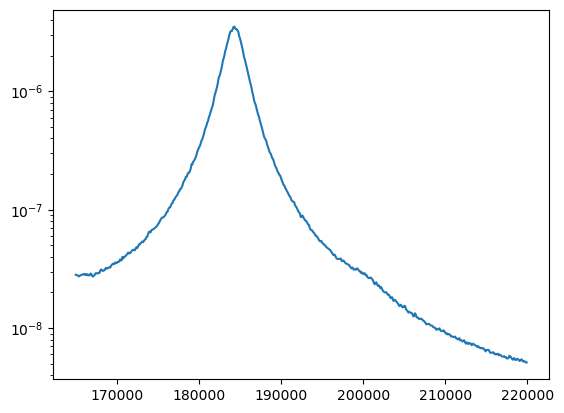

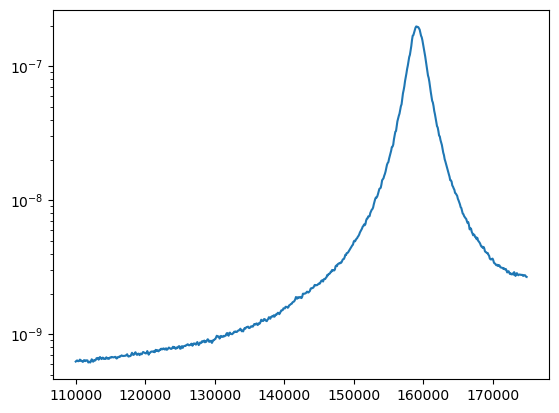

In [581]:
lb1 = 100
ub1 = 700
lb2 = 1650
ub2 = 2200
lb3 = 1100
ub3 = 1750
plt.figure()
plt.plot(PSDA[0][0][lb1:ub1], PSDA[0][1][lb1:ub1])
plt.yscale('log')
plt.figure()
plt.plot(PSDA[0][0][lb2:ub2], PSDA[0][1][lb2:ub2])
plt.yscale('log')
plt.figure()
plt.plot(PSDB[0][0][lb3:ub3], PSDB[0][1][lb3:ub3])
plt.yscale('log')

In [582]:
calz = np.trapz(PSDA[0][1][lb1:ub1], PSDA[0][0][lb1:ub1])
caly = np.trapz(PSDA[0][1][lb2:ub2], PSDA[0][0][lb2:ub2])
calx = np.trapz(PSDB[0][1][lb3:ub3], PSDB[0][0][lb3:ub3])

In [584]:
print(calx)
print(caly)
print(calz)

0.0008499706250714502
0.014648135860354674
0.0016724781717892645


In [553]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230823\\y gain 3\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
channels = ['A', 'B']
PSDA3, PSDB3 = make_PSDs(filepath, extensions, channels)
filepath = 'D:\\Experiment\\Cooling\\230823\\y gain 2\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
channels = ['A', 'B']
PSDA2, PSDB2 = make_PSDs(filepath, extensions, channels)
filepath = 'D:\\Experiment\\Cooling\\230823\\y gain\\'
extensions = ['10.mat', '20.mat', '30.mat', '40.mat']
channels = ['A', 'B']
PSDA1, PSDB1 = make_PSDs(filepath, extensions, channels)

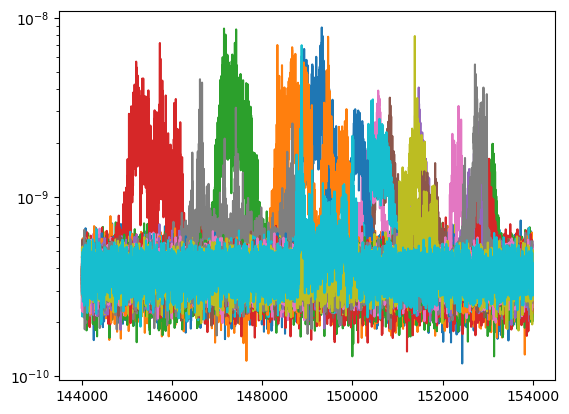

In [554]:
#lb = 35000
#ub = 40000
#lb = 165000
#ub = 181000
lb = 144000
ub = 154000
for i in PSDB1:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
for i in PSDB2:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
for i in PSDB3:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
plt.yscale('log')

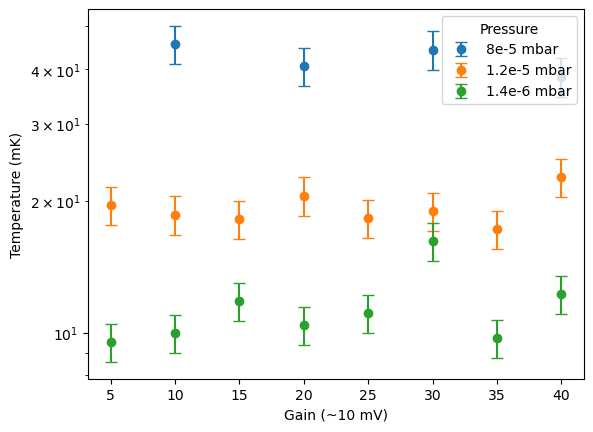

In [556]:
areas1 = []
for i in PSDB1:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas1.append(area - 3.5*10**(-10)*10000)
areas2 = []
for i in PSDB2:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas2.append(area - 3.5*10**(-10)*10000)
areas3 = []
for i in PSDB3:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas3.append(area - 3.5*10**(-10)*10000)

gain1 = [10, 20, 30, 40]
gain2 = [5, 10, 15, 20, 25, 30, 35, 40]

plt.errorbar(gain1, np.array(areas1)/calx*293*1000, yerr = 0.1*np.array(areas1)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '8e-5 mbar')
plt.errorbar(gain2, np.array(areas2)/calx*293*1000, yerr = 0.1*np.array(areas2)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.2e-5 mbar')
plt.errorbar(gain2, np.array(areas3)/calx*293*1000, yerr = 0.1*np.array(areas3)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.4e-6 mbar')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Gain (~10 mV)')
plt.legend(title = 'Pressure')

In [557]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230823\\x gain 3\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
channels = ['A', 'B']
PSDA3, PSDB3 = make_PSDs(filepath, extensions, channels)
filepath = 'D:\\Experiment\\Cooling\\230823\\x gain 2\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
channels = ['A', 'B']
PSDA2, PSDB2 = make_PSDs(filepath, extensions, channels)
filepath = 'D:\\Experiment\\Cooling\\230823\\x gain\\'
extensions = ['10.mat', '20.mat', '30.mat', '40.mat']
channels = ['A', 'B']
PSDA1, PSDB1 = make_PSDs(filepath, extensions, channels)

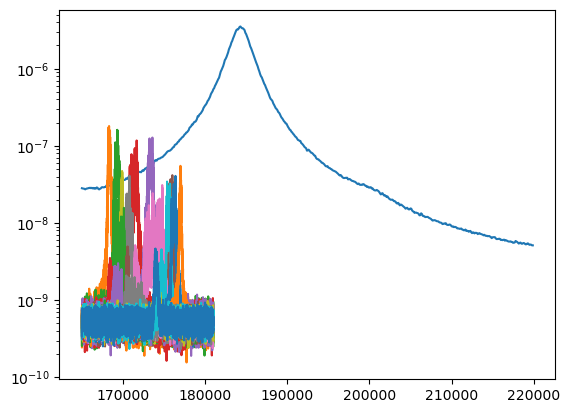

In [565]:
#lb = 35000
#ub = 40000
lb = 165000
ub = 181000
#lb = 144000
#ub = 154000
plt.plot(PSDA[0][0][lb2:ub2], PSDA[0][1][lb2:ub2])
for i in PSDA1:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
for i in PSDA2:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
for i in PSDA3:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
plt.yscale('log')

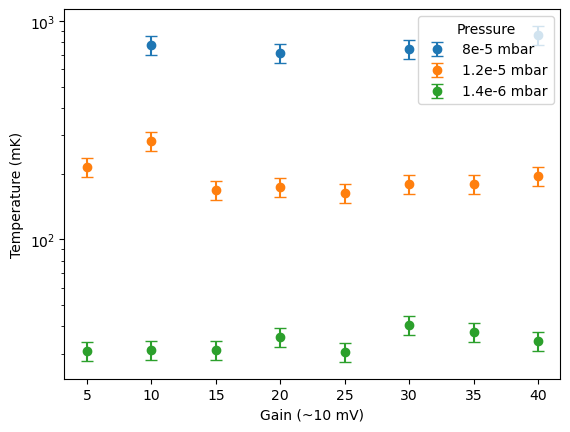

In [563]:
areas1 = []
for i in PSDA1:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas1.append(area - 5*10**(-10)*16000)
areas2 = []
for i in PSDA2:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas2.append(area - 5*10**(-10)*16000)
areas3 = []
for i in PSDA3:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas3.append(area - 5*10**(-10)*16000)

gain1 = [10, 20, 30, 40]
gain2 = [5, 10, 15, 20, 25, 30, 35, 40]

plt.errorbar(gain1, np.array(areas1)/caly*293*1000, yerr = 0.1*np.array(areas1)/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '8e-5 mbar')
plt.errorbar(gain2, np.array(areas2)/caly*293*1000, yerr = 0.1*np.array(areas2)/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.2e-5 mbar')
plt.errorbar(gain2, np.array(areas3)/caly*293*1000, yerr = 0.1*np.array(areas3)/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.4e-6 mbar')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Gain (~10 mV)')
plt.legend(title = 'Pressure')

In [567]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230823\\z gain 3\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
channels = ['A', 'B']
PSDA3, PSDB3 = make_PSDs(filepath, extensions, channels)
filepath = 'D:\\Experiment\\Cooling\\230823\\z gain 2\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
channels = ['A', 'B']
PSDA2, PSDB2 = make_PSDs(filepath, extensions, channels)
filepath = 'D:\\Experiment\\Cooling\\230823\\z gain\\'
extensions = ['10.mat', '20.mat', '30.mat', '40.mat']
channels = ['A', 'B']
PSDA1, PSDB1 = make_PSDs(filepath, extensions, channels)

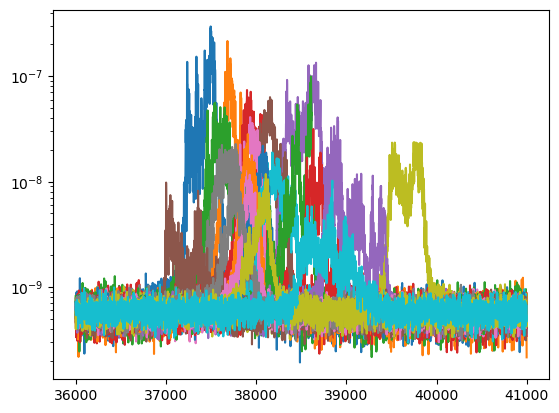

In [568]:
lb = 36000
ub = 41000
#lb = 165000
#ub = 181000
#lb = 144000
#ub = 154000
for i in PSDA1:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
for i in PSDA2:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
for i in PSDA3:
    plt.plot(i[0][lb:ub], i[1][lb:ub])
plt.yscale('log')

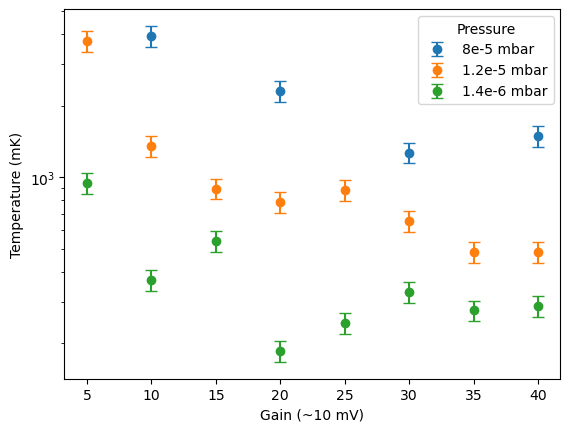

In [569]:
areas1 = []
for i in PSDA1:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas1.append(area - 5*10**(-10)*5000)
areas2 = []
for i in PSDA2:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas2.append(area - 5*10**(-10)*5000)
areas3 = []
for i in PSDA3:
    area = np.trapz(i[1][lb:ub], i[0][lb:ub])
    areas3.append(area - 5*10**(-10)*5000)

gain1 = [10, 20, 30, 40]
gain2 = [5, 10, 15, 20, 25, 30, 35, 40]

plt.errorbar(gain1, np.array(areas1)/calz*293*1000, yerr = 0.1*np.array(areas1)/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '8e-5 mbar')
plt.errorbar(gain2, np.array(areas2)/calz*293*1000, yerr = 0.1*np.array(areas2)/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.2e-5 mbar')
plt.errorbar(gain2, np.array(areas3)/calz*293*1000, yerr = 0.1*np.array(areas3)/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.4e-6 mbar')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Gain (~10 mV)')
plt.legend(title = 'Pressure')

In [586]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230823\\Pump down 2\\'
extensions = ['tt1.mat', 'tt2.mat', 'tt3.mat', 'tt4.mat', 'tt5.mat', 'tt6.mat']
channels = ['A', 'B']
PSDA, PSDB = make_PSDs(filepath, extensions, channels)

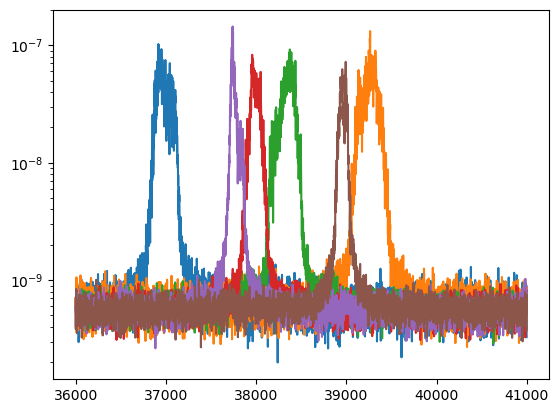

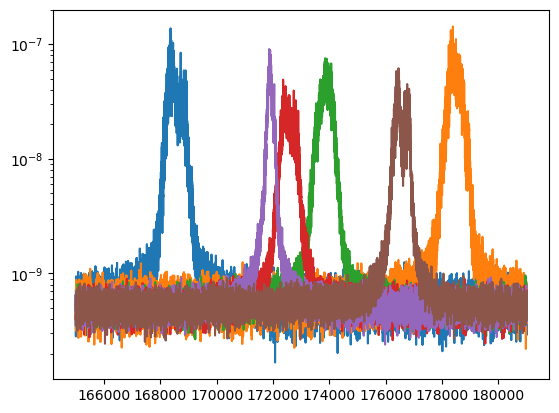

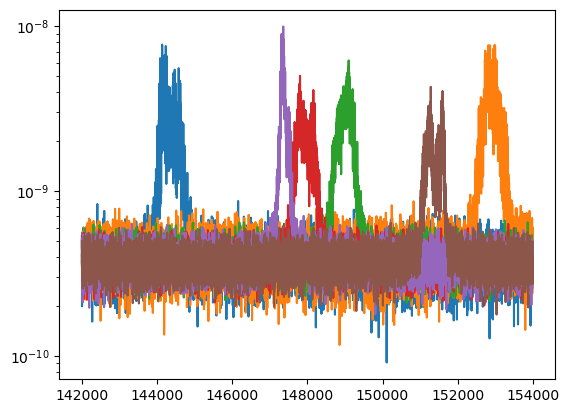

In [587]:
lb1 = 36000
ub1 = 41000
lb2 = 165000
ub2 = 181000
lb3 = 142000
ub3 = 154000
for i in PSDA:
    plt.plot(i[0][lb1:ub1], i[1][lb1:ub1])
plt.yscale('log')
plt.figure()
for i in PSDA:
    plt.plot(i[0][lb2:ub2], i[1][lb2:ub2])
plt.yscale('log')
plt.figure()
for i in PSDB:
    plt.plot(i[0][lb3:ub3], i[1][lb3:ub3])
plt.yscale('log')

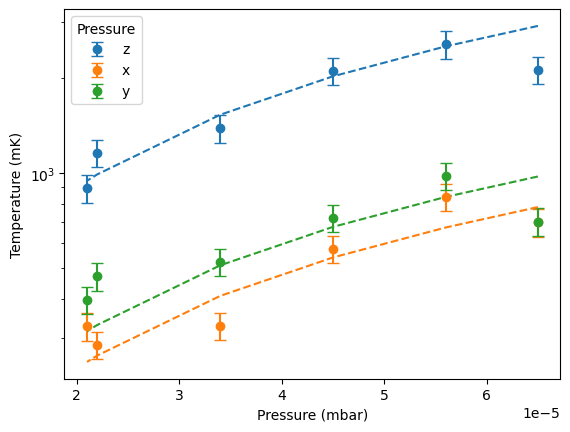

In [596]:
areas1 = []
for i in PSDA:
    area = np.trapz(i[1][lb1:ub1], i[0][lb1:ub1])
    areas1.append(area - 4*10**(-10)*5000)
areas2 = []
for i in PSDA:
    area = np.trapz(i[1][lb2:ub2], i[0][lb2:ub2])
    areas2.append(area - 5*10**(-10)*16000)
areas3 = []
for i in PSDB:
    area = np.trapz(i[1][lb3:ub3], i[0][lb3:ub3])
    areas3.append(area - 3.5*10**(-10)*12000)

P = [6.5e-5, 5.6e-5, 4.5e-5, 3.4e-5, 2.2e-5, 2.1e-5]

plt.errorbar(P, np.array(areas1)[:]/calz*293*1000, yerr = 0.1*np.array(areas1[:])/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'z')
plt.errorbar(P, np.array(areas2)[:]/caly*293*1000, yerr = 0.1*np.array(areas2[:])/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'x')
plt.errorbar(P, np.array(areas3)[:]/calx*293*1000, yerr = 0.1*np.array(areas3[:])/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'y')
plt.plot(P, np.array(P)*45000000, '--', color = 'tab:blue')
plt.plot(P, np.array(P)*12000000, '--', color = 'tab:orange')
plt.plot(P, np.array(P)*15000000, '--', color = 'tab:green')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Pressure (mbar)')
plt.legend(title = 'Pressure')

In [597]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230823\\Pump down 3\\'
extensions = ['tt1.mat', 'tt2.mat', 'tt3.mat', 'tt4.mat', 'tt5.mat', 'tt6.mat', 'tt7.mat', 'tt8.mat']
channels = ['A', 'B']
PSDA, PSDB = make_PSDs(filepath, extensions, channels)

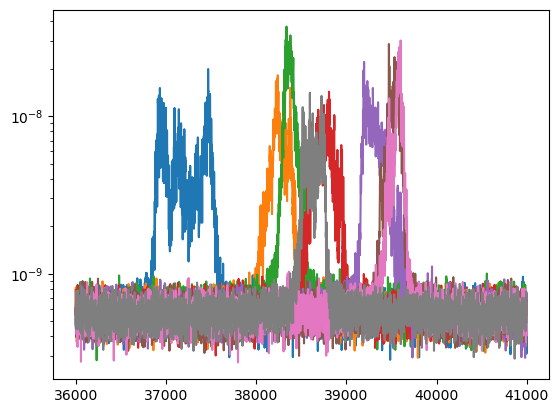

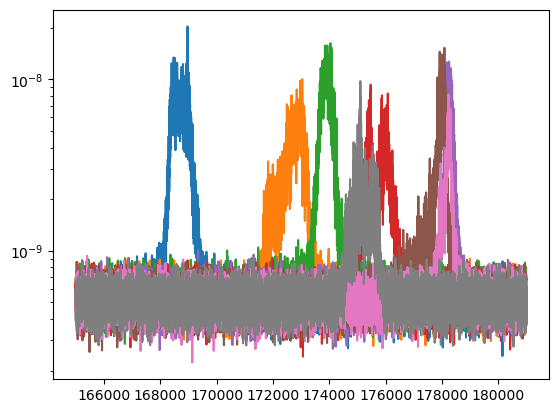

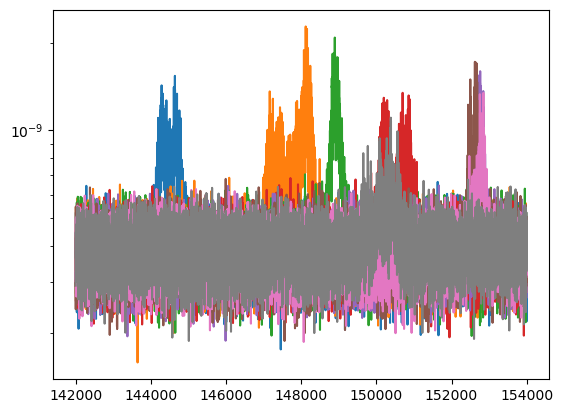

In [598]:
lb1 = 36000
ub1 = 41000
lb2 = 165000
ub2 = 181000
lb3 = 142000
ub3 = 154000
for i in PSDA:
    plt.plot(i[0][lb1:ub1], i[1][lb1:ub1])
plt.yscale('log')
plt.figure()
for i in PSDA:
    plt.plot(i[0][lb2:ub2], i[1][lb2:ub2])
plt.yscale('log')
plt.figure()
for i in PSDB:
    plt.plot(i[0][lb3:ub3], i[1][lb3:ub3])
plt.yscale('log')

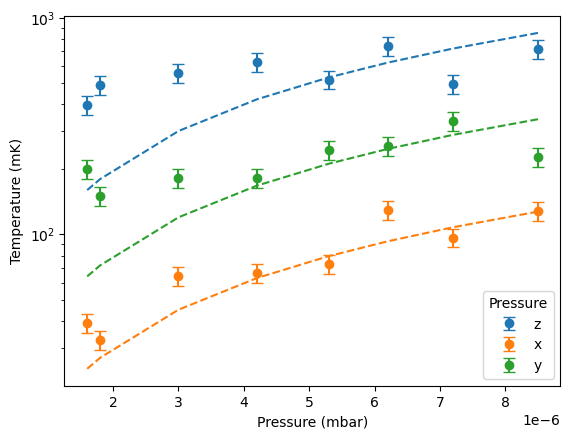

In [603]:
areas12 = []
for i in PSDA:
    area = np.trapz(i[1][lb1:ub1], i[0][lb1:ub1])
    areas12.append(area - 4*10**(-10)*5000)
areas22 = []
for i in PSDA:
    area = np.trapz(i[1][lb2:ub2], i[0][lb2:ub2])
    areas22.append(area - 5*10**(-10)*16000)
areas32 = []
for i in PSDB:
    area = np.trapz(i[1][lb3:ub3], i[0][lb3:ub3])
    areas32.append(area - 3.5*10**(-10)*12000)

P2 = [8.5e-6, 7.2e-6, 6.2e-6, 5.3e-6, 4.2e-6, 3.0e-6, 1.8e-6, 1.6e-6]

plt.errorbar(P2, np.array(areas12)[:]/calz*293*1000, yerr = 0.1*np.array(areas12[:])/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'z')
plt.errorbar(P2, np.array(areas22)[:]/caly*293*1000, yerr = 0.1*np.array(areas22[:])/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'x')
plt.errorbar(P2, np.array(areas32)[:]/calx*293*1000, yerr = 0.1*np.array(areas32[:])/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'y')
plt.plot(P2, np.array(P2)*100000000, '--', color = 'tab:blue')
plt.plot(P2, np.array(P2)*15000000, '--', color = 'tab:orange')
plt.plot(P2, np.array(P2)*40000000, '--', color = 'tab:green')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Pressure (mbar)')
plt.legend(title = 'Pressure')

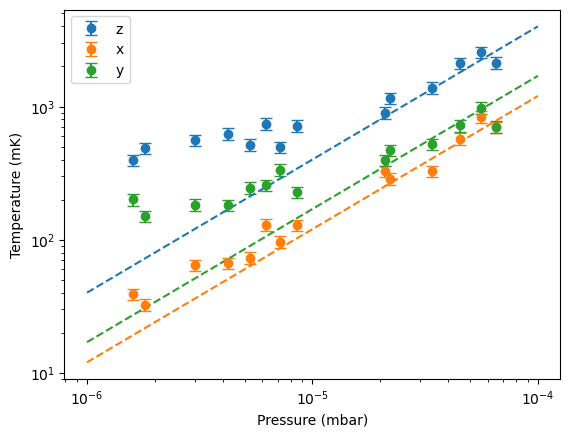

In [612]:
P3 = np.logspace(-6, -4, 100)
plt.errorbar(P, np.array(areas1[:])/calz*293*1000, yerr = 0.1*np.array(areas1[:])/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'z')
plt.errorbar(P, np.array(areas2[:])/caly*293*1000, yerr = 0.1*np.array(areas2[:])/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'x')
plt.errorbar(P, np.array(areas3[:])/calx*293*1000, yerr = 0.1*np.array(areas3[:])/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'y')
plt.errorbar(P2, np.array(areas12[:])/calz*293*1000, yerr = 0.1*np.array(areas12[:])/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, color = 'tab:blue')
plt.errorbar(P2, np.array(areas22[:])/caly*293*1000, yerr = 0.1*np.array(areas22[:])/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, color = 'tab:orange')
plt.errorbar(P2, np.array(areas32[:])/calx*293*1000, yerr = 0.1*np.array(areas32[:])/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, color = 'tab:green')
plt.plot(P3, np.array(P3)*4e7, '--', color = 'tab:blue')
plt.plot(P3, np.array(P3)*1.2e7, '--', color = 'tab:orange')
plt.plot(P3, np.array(P3)*1.7e7, '--', color = 'tab:green')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Pressure (mbar)')
plt.legend()

In [122]:
s = 100000
PSDs = []
PSDs2 = []
PSDs3 = []
for i in range(200):
    PSD = scisig.welch(tts[0][i*s:(i+1)*s], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDs.append(PSD[1])
    PSD = scisig.welch(tts[1][i*s:(i+1)*s], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDs2.append(PSD[1])
    PSD = scisig.welch(tts[2][i*s:(i+1)*s], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDs3.append(PSD[1])
freq = PSD[0]

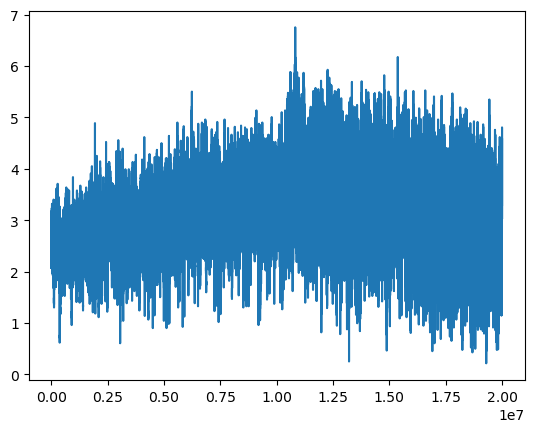

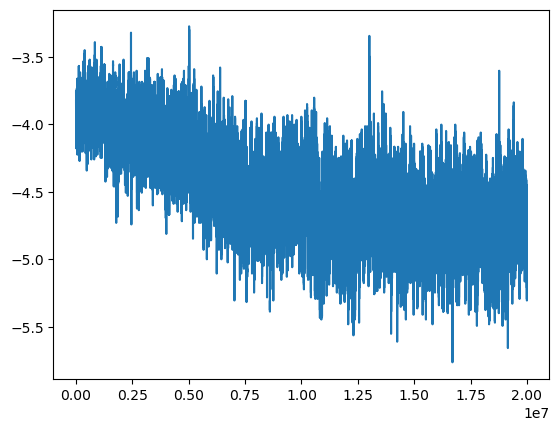

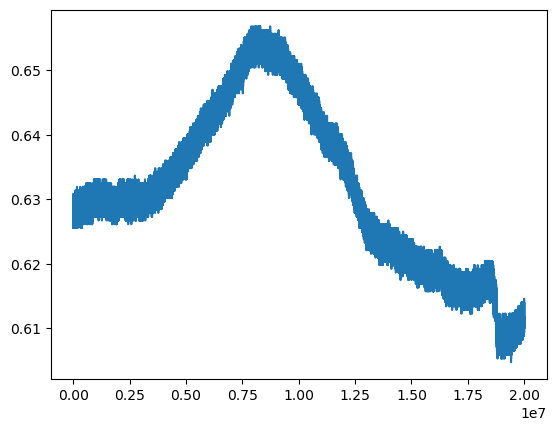

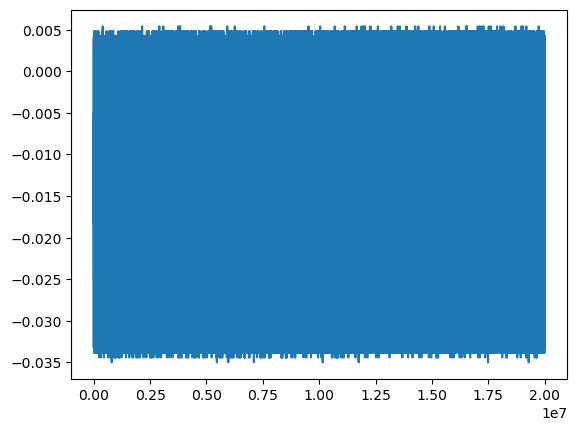

In [147]:
lb = 0#104*100000
ub = -1#105*100000
plt.plot(tts[0][lb:ub])
plt.figure()
plt.plot(tts[1][lb:ub])
plt.figure()
plt.plot(tts[2][lb:ub])
plt.figure()
plt.plot(tts[3][lb:ub])

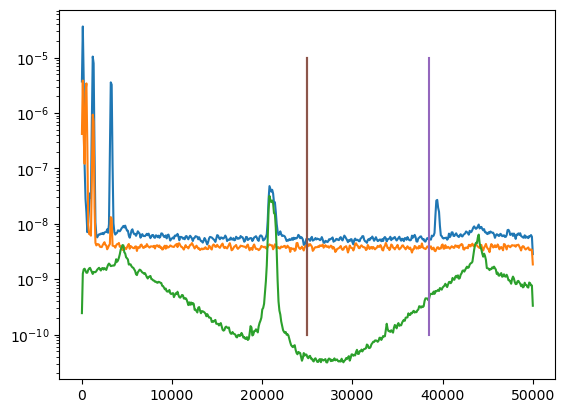

In [136]:
plt.plot(freq, PSDs[103])
plt.plot(freq, PSDs2[103])
plt.plot(freq, PSDs3[103])
plt.plot([25000, 25000], [10**(-10), 10**(-5)])
plt.plot([38500, 38500], [10**(-10), 10**(-5)])
plt.plot([25000, 25000], [10**(-10), 10**(-5)])
plt.yscale('log')

In [24]:
filepath = 'D:\\Experiment\\Cooling\\230822\\Param Scan\\z\\Phase 2\\tt'
extensions = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
channels = ['A']
PSDs = []
areas = []
lb = int(0.1*30000)
ub = int(0.1*45000)
for i in extensions:
    tts, Tinterval = load_data(filepath+i+'.mat', channels)
    PSD = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.1/Tinterval))
    PSDs.append(PSD[1])
    area = np.trapz(PSD[1][lb:ub], PSD[0][lb:ub])
    areas.append(area)
freq = PSD[0]

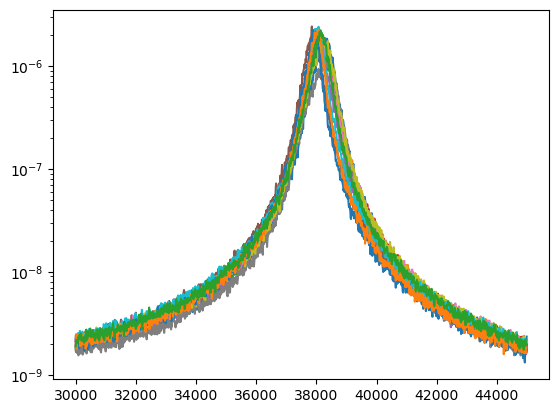

In [25]:
for i in PSDs:
    plt.plot(freq[lb:ub], i[lb:ub])
plt.yscale('log')

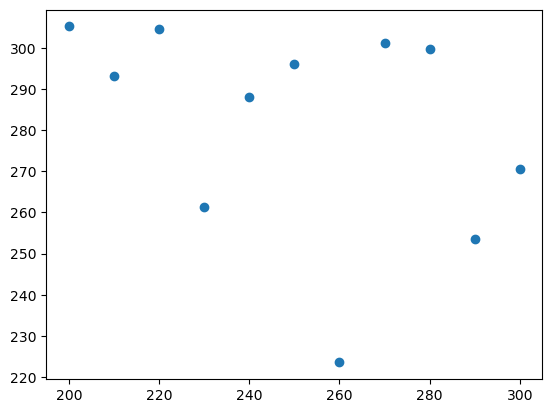

In [28]:
phase = [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
plt.plot(phase, np.array(areas[1:-1])/areas[0]*293, 'o')

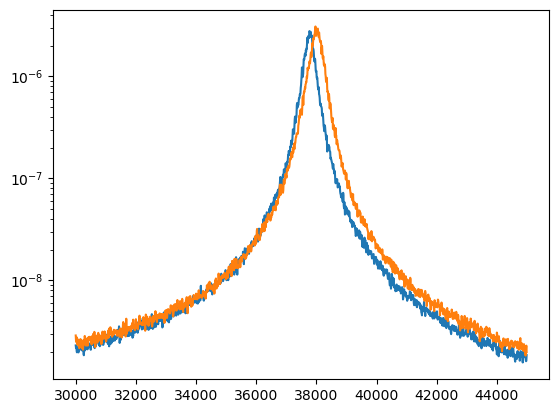

In [22]:
plt.plot(freq[lb:ub], PSDs[1][lb:ub])
plt.plot(freq[lb:ub], PSDs[7][lb:ub])
plt.yscale('log')